In [1484]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import re
df = pd.read_csv("googleplaystore.csv")



In [1486]:
# Check dataset info
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [1488]:
df.shape

(10841, 13)

In [1490]:
df.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [1492]:
df.Rating.isnull()

0        False
1        False
2        False
3        False
4        False
         ...  
10836    False
10837    False
10838     True
10839    False
10840    False
Name: Rating, Length: 10841, dtype: bool

In [1494]:
R_mean=df.Rating.mean()
R_mean

4.193338315362443

In [1496]:
df.Rating = df.Rating.fillna(R_mean)

In [1498]:
df.Rating.isnull()

0        False
1        False
2        False
3        False
4        False
         ...  
10836    False
10837    False
10838    False
10839    False
10840    False
Name: Rating, Length: 10841, dtype: bool

In [1500]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          10841 non-null  float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [1502]:
#df['Price'] = df['Price'].str.lstrip('$').astype(float)
#ValueError: could not convert string to float: 'Everyone'
#Everyone is a Free 
df['Price'] = pd.to_numeric(df['Price'].str.lstrip('$'), errors='coerce')


In [1504]:
df['Price'] = df['Price'].fillna(0)

In [1506]:
df['Type'].unique()

array(['Free', 'Paid', nan, '0'], dtype=object)

In [1508]:
df[df['Type']=='0']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,0.0,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [1510]:
df.loc[df['Type'] == '0', 'Type'] = "Free"

In [1512]:
df['Type'].unique()

array(['Free', 'Paid', nan], dtype=object)

In [1514]:
df[df['Type'].isna()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
9148,Command & Conquer: Rivals,FAMILY,4.193338,0,Varies with device,0,NaN,0.0,Everyone 10+,Strategy,"June 28, 2018",Varies with device,Varies with device


In [1516]:
df.loc[df['Type'].isna(), 'Type'] = "Free"

In [1518]:
df['Type'].unique()

array(['Free', 'Paid'], dtype=object)

In [1520]:
df.rename(columns={'Price': 'Price($)'}, inplace=True)

In [1522]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          10841 non-null  float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10841 non-null  object 
 7   Price($)        10841 non-null  float64
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(2), object(11)
memory usage: 1.1+ MB


In [1524]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price($),Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [1526]:
df['Last Updated'] = pd.to_datetime(df['Last Updated'], errors='coerce')

In [1528]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             10841 non-null  object        
 1   Category        10841 non-null  object        
 2   Rating          10841 non-null  float64       
 3   Reviews         10841 non-null  object        
 4   Size            10841 non-null  object        
 5   Installs        10841 non-null  object        
 6   Type            10841 non-null  object        
 7   Price($)        10841 non-null  float64       
 8   Content Rating  10840 non-null  object        
 9   Genres          10841 non-null  object        
 10  Last Updated    10840 non-null  datetime64[ns]
 11  Current Ver     10833 non-null  object        
 12  Android Ver     10838 non-null  object        
dtypes: datetime64[ns](1), float64(2), object(10)
memory usage: 1.1+ MB


In [1530]:
df[df['Last Updated'].isna()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price($),Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,Free,0.0,NaN,"February 11, 2018",NaT,4.0 and up,NaN


In [1532]:
df['Last Updated']= df['Last Updated'].fillna(pd.to_datetime('2019-01-19', errors='coerce'))


In [1534]:
df[df['Last Updated'].isna()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price($),Content Rating,Genres,Last Updated,Current Ver,Android Ver


In [1536]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             10841 non-null  object        
 1   Category        10841 non-null  object        
 2   Rating          10841 non-null  float64       
 3   Reviews         10841 non-null  object        
 4   Size            10841 non-null  object        
 5   Installs        10841 non-null  object        
 6   Type            10841 non-null  object        
 7   Price($)        10841 non-null  float64       
 8   Content Rating  10840 non-null  object        
 9   Genres          10841 non-null  object        
 10  Last Updated    10841 non-null  datetime64[ns]
 11  Current Ver     10833 non-null  object        
 12  Android Ver     10838 non-null  object        
dtypes: datetime64[ns](1), float64(2), object(10)
memory usage: 1.1+ MB


In [1538]:
df['Rating'] = df['Rating'].astype(float)

In [1540]:
def converter(value):
    if isinstance(value, str):
        if 'M' in value:
            return float(value.replace('M', '')) * 1_000_000  
        elif 'K' in value:
            return float(value.replace('K', '')) * 1_000  
        else:
            try:
                return int(value)  
            except ValueError:
                return None  
    return value 


In [1542]:
df['Reviews'] = df['Reviews'].apply(converter).astype('int64')

#ValueError: invalid literal for int() with base 10: '3.0M'

In [1544]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price($),Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up


In [1546]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             10841 non-null  object        
 1   Category        10841 non-null  object        
 2   Rating          10841 non-null  float64       
 3   Reviews         10841 non-null  int64         
 4   Size            10841 non-null  object        
 5   Installs        10841 non-null  object        
 6   Type            10841 non-null  object        
 7   Price($)        10841 non-null  float64       
 8   Content Rating  10840 non-null  object        
 9   Genres          10841 non-null  object        
 10  Last Updated    10841 non-null  datetime64[ns]
 11  Current Ver     10833 non-null  object        
 12  Android Ver     10838 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(9)
memory usage: 1.1+ MB


In [1548]:
#df['Installs'] = df['Installs'].str.lstrip('+').astype(float)
#ValueError: could not convert string to float: '10,000+'
#df['Installs'] = df['Installs'].str.replace(',', '').str.replace('+', '').astype(float)
#ValueError: could not convert string to float: 'Free'

df['Installs'] = pd.to_numeric(df['Installs'].str.replace(',', '').str.replace('+', ''), errors='coerce')

In [1550]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             10841 non-null  object        
 1   Category        10841 non-null  object        
 2   Rating          10841 non-null  float64       
 3   Reviews         10841 non-null  int64         
 4   Size            10841 non-null  object        
 5   Installs        10840 non-null  float64       
 6   Type            10841 non-null  object        
 7   Price($)        10841 non-null  float64       
 8   Content Rating  10840 non-null  object        
 9   Genres          10841 non-null  object        
 10  Last Updated    10841 non-null  datetime64[ns]
 11  Current Ver     10833 non-null  object        
 12  Android Ver     10838 non-null  object        
dtypes: datetime64[ns](1), float64(3), int64(1), object(8)
memory usage: 1.1+ MB


In [1552]:
df['Installs']=df['Installs'].fillna(df['Installs'].mean())

In [1554]:
df['Category'].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION',
       '1.9'], dtype=object)

In [1556]:
df[df['Category']=='1.9']

,App,Category,Rating,Reviews,Size,Installs,Type,Price($),Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3000000,"1,000+",1.546434e+07,Free,0.0,NaN,"February 11, 2018",2019-01-19,4.0 and up,NaN


In [1558]:
df.loc[df['Category'] == '1.9', 'Category'] = "TOOLS"

In [1560]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             10841 non-null  object        
 1   Category        10841 non-null  object        
 2   Rating          10841 non-null  float64       
 3   Reviews         10841 non-null  int64         
 4   Size            10841 non-null  object        
 5   Installs        10841 non-null  float64       
 6   Type            10841 non-null  object        
 7   Price($)        10841 non-null  float64       
 8   Content Rating  10840 non-null  object        
 9   Genres          10841 non-null  object        
 10  Last Updated    10841 non-null  datetime64[ns]
 11  Current Ver     10833 non-null  object        
 12  Android Ver     10838 non-null  object        
dtypes: datetime64[ns](1), float64(3), int64(1), object(8)
memory usage: 1.1+ MB


In [1562]:
df['Size'] = df['Size'].str.rstrip('M')

In [1564]:
df.rename(columns={'Size': 'Size(M)'}, inplace=True)

In [1566]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             10841 non-null  object        
 1   Category        10841 non-null  object        
 2   Rating          10841 non-null  float64       
 3   Reviews         10841 non-null  int64         
 4   Size(M)         10841 non-null  object        
 5   Installs        10841 non-null  float64       
 6   Type            10841 non-null  object        
 7   Price($)        10841 non-null  float64       
 8   Content Rating  10840 non-null  object        
 9   Genres          10841 non-null  object        
 10  Last Updated    10841 non-null  datetime64[ns]
 11  Current Ver     10833 non-null  object        
 12  Android Ver     10838 non-null  object        
dtypes: datetime64[ns](1), float64(3), int64(1), object(8)
memory usage: 1.1+ MB


In [1568]:
df['Size(M)'] = pd.to_numeric(df['Size(M)'], errors='coerce')

In [1570]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             10841 non-null  object        
 1   Category        10841 non-null  object        
 2   Rating          10841 non-null  float64       
 3   Reviews         10841 non-null  int64         
 4   Size(M)         8829 non-null   float64       
 5   Installs        10841 non-null  float64       
 6   Type            10841 non-null  object        
 7   Price($)        10841 non-null  float64       
 8   Content Rating  10840 non-null  object        
 9   Genres          10841 non-null  object        
 10  Last Updated    10841 non-null  datetime64[ns]
 11  Current Ver     10833 non-null  object        
 12  Android Ver     10838 non-null  object        
dtypes: datetime64[ns](1), float64(4), int64(1), object(7)
memory usage: 1.1+ MB


In [1572]:
ddf = df.groupby('Category')['Size(M)'].mean()
print(ddf)

Category
ART_AND_DESIGN         12.370968
AUTO_AND_VEHICLES      20.571233
BEAUTY                 13.795745
BOOKS_AND_REFERENCE    13.846032
BUSINESS               14.868895
COMICS                 14.014286
COMMUNICATION          13.163136
DATING                 16.704265
EDUCATION              21.162385
ENTERTAINMENT          21.853333
EVENTS                 14.207143
FAMILY                 28.812833
FINANCE                18.274751
FOOD_AND_DRINK         22.185000
GAME                   44.500198
HEALTH_AND_FITNESS     23.282946
HOUSE_AND_HOME         16.207463
LIBRARIES_AND_DEMO     17.209615
LIFESTYLE              15.223353
MAPS_AND_NAVIGATION    17.074286
MEDICAL                20.354545
NEWS_AND_MAGAZINES     13.143925
PARENTING              22.512963
PERSONALIZATION        12.157143
PHOTOGRAPHY            17.571315
PRODUCTIVITY           13.874558
SHOPPING               16.742784
SOCIAL                 17.929469
SPORTS                 24.647883
TOOLS                   9.792261
T

In [1574]:

df['Size(M)'] = df['Size(M)'].fillna(df['Category'].map(ddf))

In [1575]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             10841 non-null  object        
 1   Category        10841 non-null  object        
 2   Rating          10841 non-null  float64       
 3   Reviews         10841 non-null  int64         
 4   Size(M)         10841 non-null  float64       
 5   Installs        10841 non-null  float64       
 6   Type            10841 non-null  object        
 7   Price($)        10841 non-null  float64       
 8   Content Rating  10840 non-null  object        
 9   Genres          10841 non-null  object        
 10  Last Updated    10841 non-null  datetime64[ns]
 11  Current Ver     10833 non-null  object        
 12  Android Ver     10838 non-null  object        
dtypes: datetime64[ns](1), float64(4), int64(1), object(7)
memory usage: 1.1+ MB


In [1576]:
df.head()

,App,Category,Rating,Reviews,Size(M),Installs,Type,Price($),Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000.0,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000.0,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,50000000.0,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000.0,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up


In [1580]:
def clean_version(version):
    if pd.isna(version):
        return "0.0.0"
    if version == 'Varies with device':
        return "0.0.0"
    # Regular expression to extract the version number (e.g., 4.0.3)
    match = re.match(r'(\d+\.\d+)(?:\.(\d+))?', version)
    if match:
        major_minor = match.group(1)  # Extract major and minor
        patch = match.group(2)  # Extract patch if available
        if patch is None:  # If patch is missing, set it to 0
            return f"{major_minor}.0"
        return f"{major_minor}.{patch}"
    return "0.0.0"  # Return "0.0.0" if no version is found

# Apply the function to the 'Current Ver' column and 'Android Ver'
df['Current Ver'] = df['Current Ver'].apply(clean_version)
df['Android Ver'] = df['Android Ver'].apply(clean_version)

In [1582]:
df.head()
#df.tail()

,App,Category,Rating,Reviews,Size(M),Installs,Type,Price($),Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000.0,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000.0,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,50000000.0,Free,0.0,Teen,Art & Design,2018-06-08,0.0.0,4.2.0
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000.0,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1.0,4.4.0


In [1584]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             10841 non-null  object        
 1   Category        10841 non-null  object        
 2   Rating          10841 non-null  float64       
 3   Reviews         10841 non-null  int64         
 4   Size(M)         10841 non-null  float64       
 5   Installs        10841 non-null  float64       
 6   Type            10841 non-null  object        
 7   Price($)        10841 non-null  float64       
 8   Content Rating  10840 non-null  object        
 9   Genres          10841 non-null  object        
 10  Last Updated    10841 non-null  datetime64[ns]
 11  Current Ver     10841 non-null  object        
 12  Android Ver     10841 non-null  object        
dtypes: datetime64[ns](1), float64(4), int64(1), object(7)
memory usage: 1.1+ MB


In [1586]:
df['Content Rating'].unique()

array(['Everyone', 'Teen', 'Everyone 10+', 'Mature 17+',
       'Adults only 18+', 'Unrated', nan], dtype=object)

In [1588]:
df[df['Content Rating'].isna()]

,App,Category,Rating,Reviews,Size(M),Installs,Type,Price($),Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,TOOLS,19.0,3000000,9.792261,1.546434e+07,Free,0.0,NaN,"February 11, 2018",2019-01-19,4.0.0,0.0.0


In [1590]:
df['Content Rating']=df['Content Rating'].fillna("Everyone")

In [1592]:
df[df['Content Rating'].isna()]

,App,Category,Rating,Reviews,Size(M),Installs,Type,Price($),Content Rating,Genres,Last Updated,Current Ver,Android Ver


In [1594]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             10841 non-null  object        
 1   Category        10841 non-null  object        
 2   Rating          10841 non-null  float64       
 3   Reviews         10841 non-null  int64         
 4   Size(M)         10841 non-null  float64       
 5   Installs        10841 non-null  float64       
 6   Type            10841 non-null  object        
 7   Price($)        10841 non-null  float64       
 8   Content Rating  10841 non-null  object        
 9   Genres          10841 non-null  object        
 10  Last Updated    10841 non-null  datetime64[ns]
 11  Current Ver     10841 non-null  object        
 12  Android Ver     10841 non-null  object        
dtypes: datetime64[ns](1), float64(4), int64(1), object(7)
memory usage: 1.1+ MB


##1.	What is the most expensive app on the Play Store?

In [1597]:
df[df['Price($)']==np.max(df['Price($)'])]

,App,Category,Rating,Reviews,Size(M),Installs,Type,Price($),Content Rating,Genres,Last Updated,Current Ver,Android Ver
4367,I'm Rich - Trump Edition,LIFESTYLE,3.6,275,7.3,10000.0,Paid,400.0,Everyone,Lifestyle,2018-05-03,1.0.1,4.1.0


##2.	Which genre has the highest number of apps?

In [1606]:
df['Genres'].unique()

array(['Art & Design', 'Art & Design;Pretend Play',
       'Art & Design;Creativity', 'Art & Design;Action & Adventure',
       'Auto & Vehicles', 'Beauty', 'Books & Reference', 'Business',
       'Comics', 'Comics;Creativity', 'Communication', 'Dating',
       'Education;Education', 'Education', 'Education;Creativity',
       'Education;Music & Video', 'Education;Action & Adventure',
       'Education;Pretend Play', 'Education;Brain Games', 'Entertainment',
       'Entertainment;Music & Video', 'Entertainment;Brain Games',
       'Entertainment;Creativity', 'Events', 'Finance', 'Food & Drink',
       'Health & Fitness', 'House & Home', 'Libraries & Demo',
       'Lifestyle', 'Lifestyle;Pretend Play',
       'Adventure;Action & Adventure', 'Arcade', 'Casual', 'Card',
       'Casual;Pretend Play', 'Action', 'Strategy', 'Puzzle', 'Sports',
       'Music', 'Word', 'Racing', 'Casual;Creativity',
       'Casual;Action & Adventure', 'Simulation', 'Adventure', 'Board',
       'Trivia', 'Role 

In [1618]:
dd = df.copy()
def split_genre(category):
    return category.split(';')

dd['Genres'] = dd['Genres'].apply(split_genre)

dd['Genres']

0                      [Art & Design]
1        [Art & Design, Pretend Play]
2                      [Art & Design]
3                      [Art & Design]
4          [Art & Design, Creativity]
                     ...             
10836                     [Education]
10837                     [Education]
10838                       [Medical]
10839             [Books & Reference]
10840                     [Lifestyle]
Name: Genres, Length: 10841, dtype: object

In [1622]:
Genres_all = [item for sublist in dd['Genres'] for item in sublist]
unique_Genres = pd.Series(Genres_all).value_counts()
print(unique_Genres)

Tools                      843
Education                  761
Entertainment              667
Medical                    463
Business                   460
Productivity               424
Sports                     402
Personalization            392
Communication              388
Lifestyle                  383
Action                     382
Finance                    366
Health & Fitness           343
Photography                335
Social                     295
News & Magazines           283
Casual                     270
Shopping                   260
Travel & Local             258
Arcade                     237
Dating                     234
Books & Reference          234
Simulation                 218
Video Players & Editors    178
Puzzle                     167
Action & Adventure         138
Maps & Navigation          137
Food & Drink               127
Role Playing               123
Racing                     119
Educational                112
Strategy                   111
Adventur

#3.	What is the average size of free vs. paid apps?

In [1625]:
Average=df['Size(M)'].groupby(df['Type']).mean()
Average

Type
Free    21.822300
Paid    20.695817
Name: Size(M), dtype: float64

#4.	What are the top 5 most expensive apps with a perfect rating (5)?

In [1628]:
dd= df[df['Rating']==5]
dd_sorted = dd.sort_values(by='Price($)', ascending=False)
dd_sorted.head()

,App,Category,Rating,Reviews,Size(M),Installs,Type,Price($),Content Rating,Genres,Last Updated,Current Ver,Android Ver
5489,AP Art History Flashcards,FAMILY,5.0,1,96.000000,10.0,Paid,29.99,Mature 17+,Education,2016-01-19,3.30.0,4.0.0
7477,USMLE Step 2 CK Flashcards,FAMILY,5.0,1,40.000000,10.0,Paid,19.99,Everyone,Education,2014-05-26,2.47.0,2.2.0
5246,Hey AJ! It's Bedtime!,FAMILY,5.0,1,63.000000,10.0,Paid,4.99,Everyone,Education,2018-04-04,1.0.59,2.3.0
7204,TI-84 CE Graphing Calculator Manual TI 84,FAMILY,5.0,1,27.000000,100.0,Paid,4.99,Everyone,Education,2018-03-28,1.5.2,4.1.0
5482,meStudying: AP English Lit,FAMILY,5.0,1,28.812833,10.0,Paid,4.99,Everyone,Education,2013-08-31,1.3.0,2.0.1


#5.	How many apps have received more than 50K reviews?

In [1631]:
dd = df[df['Reviews'] > 50000]['Reviews']
dd.count()

2783

#6.	What is the average price of apps, grouped by genre and number of installs?

In [1643]:
average_price = df.groupby(['Genres', 'Installs'])['Price($)'].mean()

#print(average_price['Education'])
average_price

Genres  Installs  
Action  10.0          0.000000
        50.0          0.663333
        100.0         1.096000
        500.0         0.000000
        1000.0        0.372500
                        ...   
Word    100000.0      0.000000
        1000000.0     0.000000
        5000000.0     0.000000
        10000000.0    0.000000
        50000000.0    0.000000
Name: Price($), Length: 922, dtype: float64

#7.	How many apps have a rating higher than 4.7, and what is their average price?

In [1667]:
average_price = df[ df['Rating']>4.7]['Price($)'].mean()
count = df[df['Rating'] > 4.7]['Rating'].count()
print(count)
print(average_price)

596
0.501006711409396


#8.	What is Google's estimated revenue from apps with 5,000,000+ installs?

In [1678]:
paid_apps = df[(df['Installs'] >= 5000000) & (df['Type'] == 'Paid')].copy()
paid_apps['Google_Revenue'] = paid_apps['Installs'] * paid_apps['Price($)'] * 0.30
total_revenue = paid_apps['Google_Revenue'].sum()
print(f"Google's estimated revenue from apps with 5,000,000+ installs: ${total_revenue:,.2f}")

Google's estimated revenue from apps with 5,000,000+ installs: $44,910,000.00


#9.	What are the maximum and minimum sizes of free vs. paid apps?

In [1693]:
data = df['Size(M)'].groupby(df['Type']).max()
print(data)
data = df['Size(M)'].groupby(df['Type']).min()
print(data)

Type
Free    100.0
Paid    100.0
Name: Size(M), dtype: float64
Type
Free    1.0
Paid    1.0
Name: Size(M), dtype: float64


#10.	Is there a correlation between an app’s rating, number of reviews, size, and its price?

In [1697]:
df_subset = df[['Rating', 'Reviews', 'Size(M)', 'Price($)']]
# Calculate the correlation matrix
correlation_matrix = df_subset.corr()

# Print the correlation matrix
print(correlation_matrix)


            Rating   Reviews   Size(M)  Price($)
Rating    1.000000  0.067523  0.065367 -0.019519
Reviews   0.067523  1.000000  0.116477 -0.009672
Size(M)   0.065367  0.116477  1.000000 -0.020883
Price($) -0.019519 -0.009672 -0.020883  1.000000


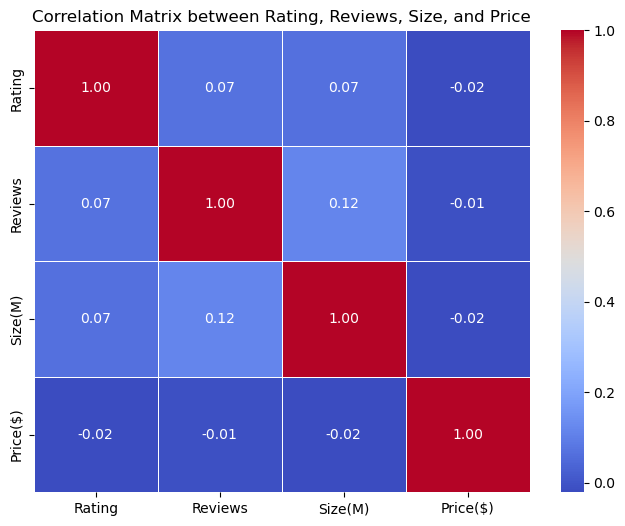

In [1707]:
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix between Rating, Reviews, Size, and Price")
plt.show()


## Correlations are very weak

#11.	How many apps exist for each type (free/paid) across different content ratings?

In [1729]:
data = df.groupby(['Type','Rating']).size()
print(data)

Type  Rating
Free  1.0       14
      1.2        1
      1.4        3
      1.5        3
      1.6        4
                ..
Paid  4.6       82
      4.7       53
      4.8       39
      4.9        6
      5.0       28
Length: 74, dtype: int64


#12.	How many apps are compatible with Android version 4.x?

In [1746]:
data = df[df['Android Ver'].str.startswith('4')]
data['App'].count()

6959